<a href="https://colab.research.google.com/github/ayupal25/Stock-Market-Prediction/blob/main/Stock_Market_Prediction_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key = '612fca65189e669a9ba2a136ad5a396b08c05c5c')
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stock Market prediction using LSTM/AAPL.csv')
df.head()

In [14]:
df1 = df.reset_index()['close']

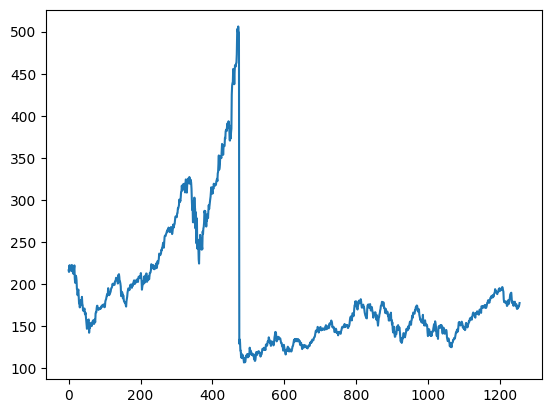

In [22]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [23]:
import numpy as np

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
training_size = int(len(df1)*0.65)
testing_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [34]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [35]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape,y_train.shape)

In [ ]:
print(X_test.shape,y_test.shape)

In [41]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [56]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [57]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.66130410948384

In [58]:
math.sqrt(mean_squared_error(y_test,test_predict))

161.66616921025965

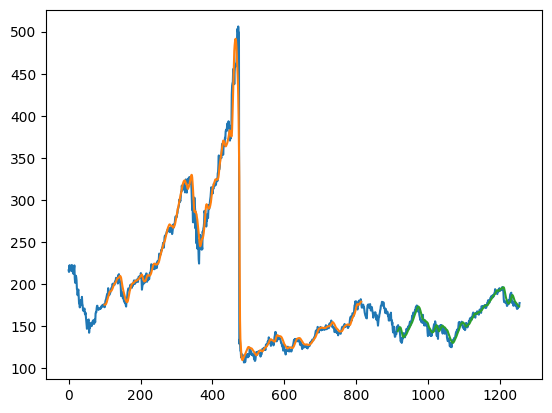

In [60]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [72]:
x_input = test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [63]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output = []
n_steps = 100
i = 0
while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(-1,1)
    x_input =x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i+=1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i+=1

print(lst_output)

In [67]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [68]:
df3 = df1.tolist()
df3.extend(lst_output)

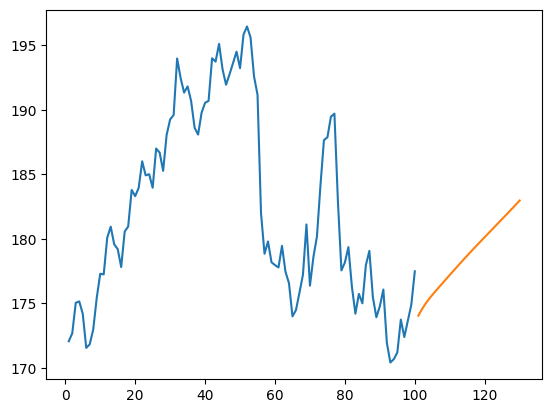

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

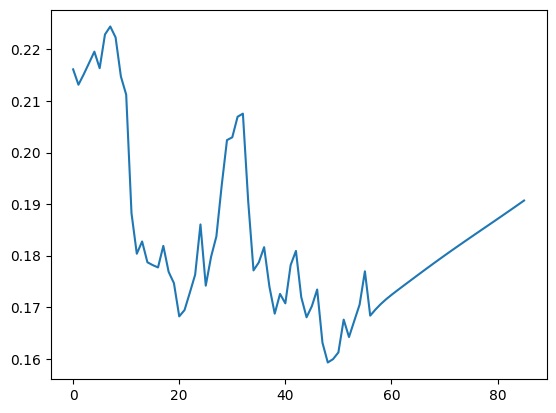

In [71]:
plt.plot(df3[1200:])